In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("C:/Users/Anshul/Downloads/IBM employee dataset/train.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany      

In [9]:
df.isna().sum().sum()

0

In [55]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,test_size=0.2,random_state=1)

In [56]:
categorical=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
numerical=['Age','DistanceFromHome','Education','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','JobInvolvement',
          'JobLevel','JobSatisfaction','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction',
          'StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole',
          'YearsSinceLastPromotion','YearsWithCurrManager']

In [57]:
y_train = df_train.Attrition.values

In [58]:
y_test = df_test.Attrition.values

In [59]:
del df_train['Attrition']
del df_test['Attrition']

In [60]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [61]:
from sklearn.feature_extraction import DictVectorizer

In [62]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [63]:
X_train=dv.transform(train_dict)

In [64]:
test_dict = df_test[categorical + numerical].to_dict(orient='records')
dv.fit(test_dict)

DictVectorizer(sparse=False)

In [65]:
X_test=dv.transform(test_dict)

In [69]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range = (-1,1))
X_train_scaled = min_max_scaler.fit_transform(X_train)

In [71]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=5000, random_state = 42)
log_reg.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=5000, random_state=42)

In [72]:
from sklearn.model_selection import cross_val_score

cross_val_score(log_reg,X_train_scaled,y_train,cv=5,scoring = 'accuracy')

array([0.87647059, 0.8816568 , 0.84615385, 0.87573964, 0.84023669])

In [73]:
from sklearn.model_selection import cross_val_predict

y_train_predict = cross_val_predict(log_reg, X_train_scaled, y_train, cv=5)

In [74]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_train_predict)

In [75]:
cm

array([[676,  30],
       [ 85,  55]], dtype=int64)

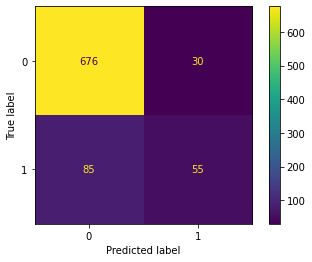

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_train, y_train_predict)
plt.show()

In [77]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [85]:
logreg = LogisticRegression(max_iter=5000)
clf = GridSearchCV(logreg,
                   param_grid = parameters, 
                   scoring='accuracy',
                   cv=5)

In [87]:
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [80]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.8675948485903238


In [81]:
logreg = LogisticRegression(C = 0.1, 
                            penalty = 'l2', 
                            solver = 'liblinear')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print("Accuracy:",logreg.score(X_test, y_test))

Accuracy: 0.8537735849056604
